#### A1 Research Question

The purpose of this data analysis is to understand the underlying factors that influence the monthly charges incurred by customers in the telecommunications company. Recognizing that cost is a significant factor in customer retention and satisfaction, this research aims to identify key predictors of monthly charges. By doing so, the study indirectly addresses the broader question of what might contribute to a customer's decision to churn, focusing on the premise that higher monthly charges can lead to increased churn rates.

#### A2 Define the goals of the data analysis

*    Identify and Quantify Influential Factors: Determine which demographic, service-related, and account-specific variables significantly impact monthly charges for customers in the telecommunications industry.
*    Model the Relationship: Develop a predictive model that quantifies the relationship between monthly charges and the identified factors, using multiple linear regression to assess the strength and nature of these relationships.
*    Insights for Strategy Development: Provide actionable insights for telecom companies to adjust pricing strategies, enhance customer service offerings, and tailor marketing efforts to reduce churn rates and improve customer satisfaction.

#### B1 Four Assumptions of a Multiple Linear Regression Model


*    Linear relationship: The relationship between each independent variable and the dependent variable is linear. There exists a linear relationship between each predictor variable and the response variable.

*    Independence: The residuals (errors) are independent. In other words, the residuals for one observation aren't influenced by the residuals of any other observation, which is crucial for the unbiasedness of the coefficients.

*    Homoscedasticity: The residuals have constant variance at different levels of the independent variables. The residuals have constant variance at every point in the linear model.

*    Multivariate Normality: When dealing with multiple independent variables, it's assumed that these variables, along with the dependent variable, are multivariate normally distributed. This assumption ensures the applicability of various multivariate statistical methods and helps in simplifying the interpretation and inference of the regression model. The residuals of the model are normally distributed.

(Statology, 2021)

#### B2 Two Benefits of Using Python

*    Versatility and Libraries: Python offers a vast array of libraries and tools like Pandas for data manipulation, NumPy for numerical calculations, Matplotlib and Seaborn for data visualization, and scikit-learn for implementing machine learning algorithms including linear regression. I also used scipy for Stats and statsmodels.api to perform Backward Elimination. This ecosystem makes Python a versatile tool for the entire data analysis process, from data cleaning to model building and evaluation.

*    Ease of Use and Community Support: Python has a relatively gentle learning curve and is known for its readability and simplicity, making it accessible to a wide range of users, from beginners to experts. Additionally, Python has a large and active community, providing extensive resources, documentation, and forums for troubleshooting, which is invaluable for analytical work and problem-solving.

#### B3 Multiple Linear Regression for Analyzing the Research Question

Multiple linear regression is an ideal analytical method for addressing my research question: "What factors influence the monthly charges of customers potentially contributing to their decision to churn?" It enables the examination of how multiple independent variables (e.g., service usage, tenure, demographics) simultaneously influence a single dependent variable (monthly charges). This is crucial for our study, as it seeks to uncover the complex interplay of factors that might affect customer churn, allowing for the quantification of each factor's impact on monthly charges. By understanding these relationships, we can identify significant predictors of churn, essential for developing targeted retention strategies.

Furthermore, multiple linear regression’s predictive capabilities are aligned with the goal of forecasting customer behavior in relation to churn. It offers a framework for testing the assumptions of linearity, independence, and normality of residuals. This ensure that my preliminary analysis suggestions are met. This methodological fit ensures not only the relevance of my findings to the telecommunications industry, but also enhances the practical application of my research in formulating actionable insights to mitigate churn by addressing the key factors influencing monthly charges.

#### C1 Data Cleaning Goals and The Steps Used

To prepare the dataset for multiple linear regression analysis, especially for the research question "What factors influence the monthly charges of customers, potentially contributing to their decision to churn?". There are several key steps in the data preparation process:


Goals:

*    Ensure data quality and relevance to the research question.
*   Address missing values, outliers, and inconsistencies.

Steps:

*    Identifying Missing Values: Check for missing data in key variables (e.g., customer demographics, service usage).
*    Handling Missing Data: Decide on strategies like imputation or removal, depending on the extent and nature of missing data.
*    Outlier Detection: Identify outliers using statistical methods or visualization. Evaluate their impact and decide whether to keep, transform, or remove them.
*    Data Type Correction: Ensure that all variables are in the correct format (e.g., numerical, categorical).
*    The categorical datatypes being used for the multiple regression analysis will be "dummied" using one-hot encoding. 
*    Consistency Check: Verify that data across all variables is consistent, e.g., no negative values in age or usage.


As for the annotated code. Some of the functions will be run to verify that the data is ready for multiple regression analysis, such as info() to make sure that validate the datatypes for each column, value_counts() to check all of the values in a column, or describe() to display summary statistics for a numeric columns.

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Loading the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D208\Task_1\churn_clean.csv')

# Check data types, number of values and size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### C2 Summary Statistics of Variables

### Dependent Variable:

In [19]:
df.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

### Independent Variables:

In [20]:
df.Tenure.describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [21]:
df.InternetService.value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [22]:
df.Contract.value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

In [23]:
df.PaymentMethod.value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [25]:
df.OnlineSecurity.value_counts()

OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64

In [26]:
df.TechSupport.value_counts()

TechSupport
No     6250
Yes    3750
Name: count, dtype: int64

In [27]:
df.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [28]:
df.Gender.value_counts()

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

In [29]:
df.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [30]:
df.PaperlessBilling.value_counts()

PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64

In [31]:
df.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [32]:
df.StreamingTV.value_counts() 

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64

In [33]:
df.StreamingMovies.value_counts()

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

#### Cleaning the Data

Cleaning the Data

The data cleaning process for the regression analysis is crucial to ensure the integrity and relevance of the variables to our research question, which seeks to understand the factors influencing customer churn. The dependent variable in this case is 'MonthlyCharge', and it will be thoroughly examined for accuracy, with any anomalies or outliers assessed for their impact on the analysis as outlined in section C1.

The chosen independent variables for this analysis include 'Tenure', 'Internet Service', 'Contract', 'Payment Method', 'Online Security', 'Tech Support', 'Age', 'Gender', 'Income', 'Paperless Billing', 'Bandwidth Usage', 'Streaming TV', and 'Streaming Movies'. These variables are selected for their potential influence on customer churn. The data cleaning process for these variables will involve:

*    Checking for Missing Values: Identifying and addressing any missing data to avoid biases in the analysis.
*    Outlier Identification and Treatment: Using statistical analysis and visualization to detect outliers and determine their nature. Appropriate actions, such as exclusion, capping, or transformation, will be taken based on the impact of these outliers on the dataset.
*    Ensuring Data Consistency: Verifying that all data is consistently formatted and accurately represents the variable it measures. This includes confirming the correct data type for each variable.
*    Normalization or Transformation: If necessary, applying normalization or other transformations to meet the assumptions of multiple linear regression, such as linearity and homoscedasticity.

By the end of this data cleaning process, the dataset will be robust and ready for multiple linear regression analysis, with 'MonthlyCharge' as the dependent variable and the selected independent variables offering insights into customer behavior and preferences.

#### C3  Univariate and Bivariate Visualizations

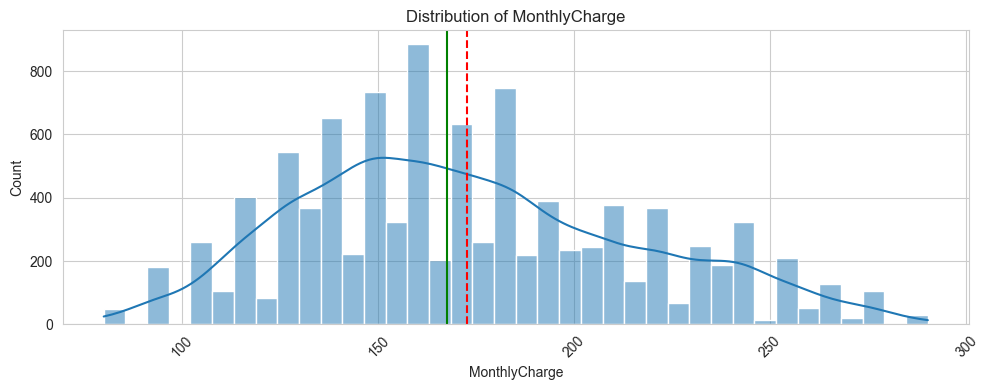

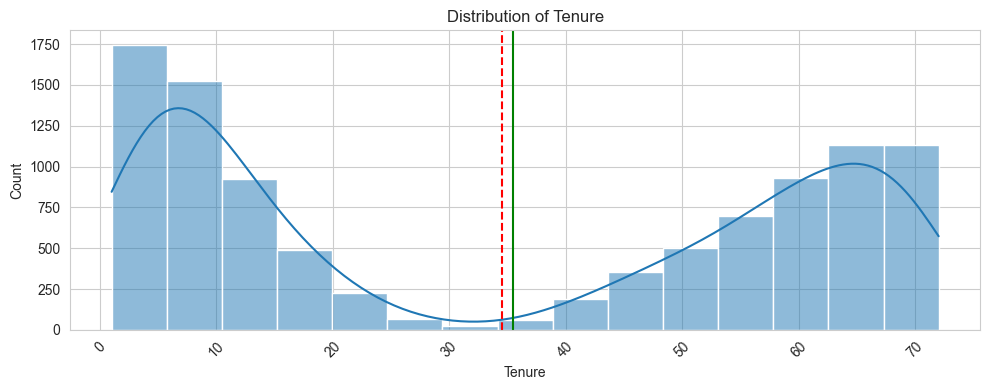

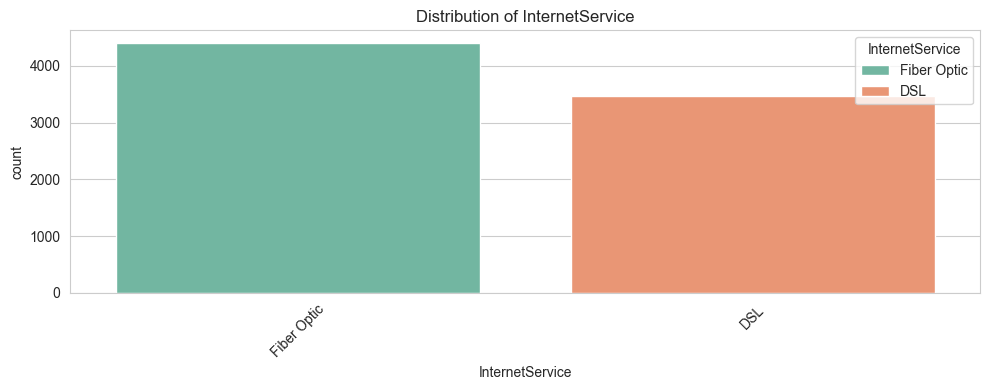

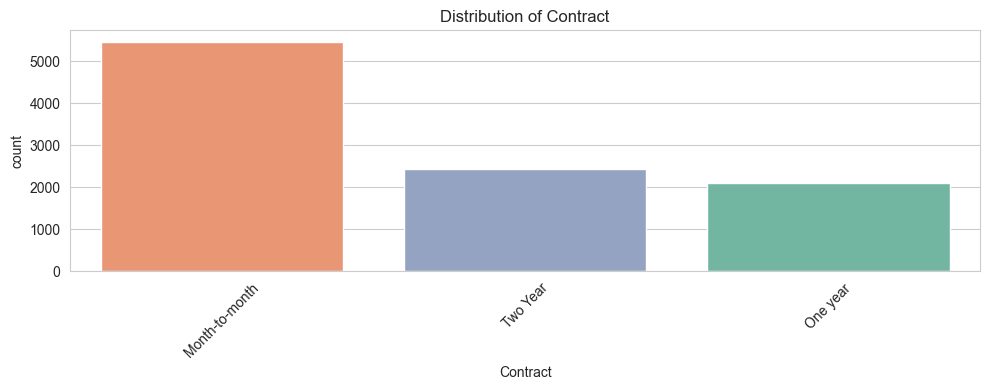

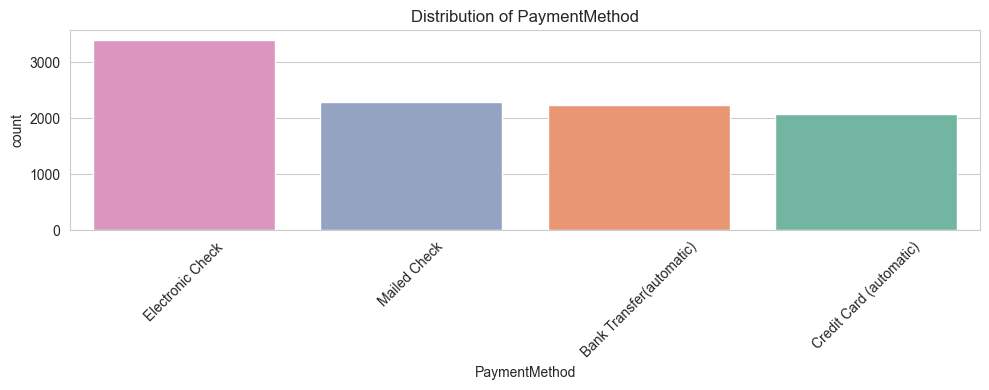

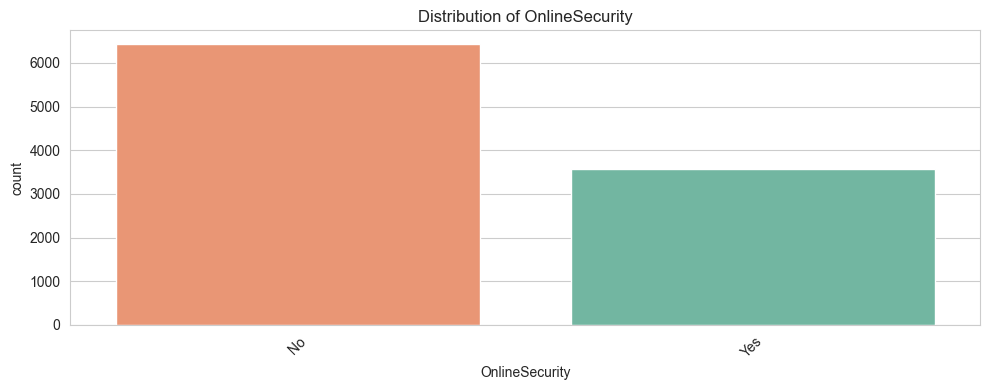

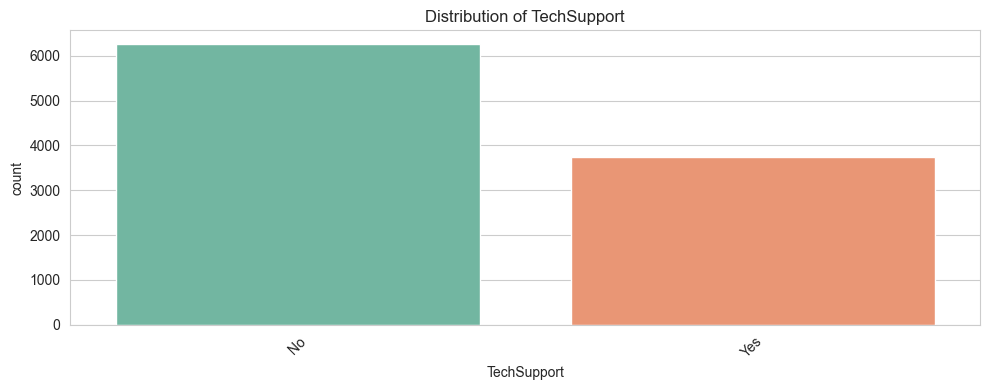

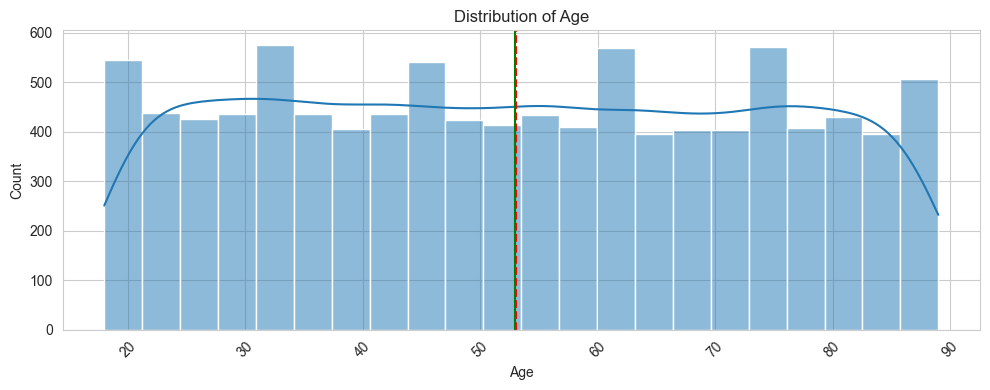

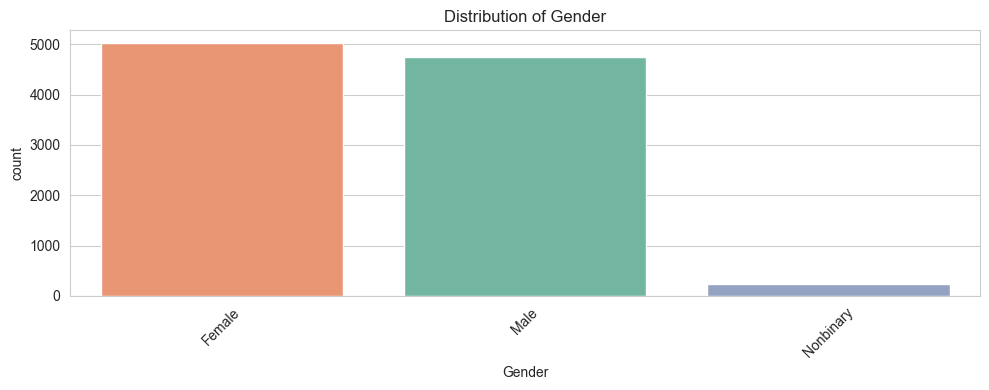

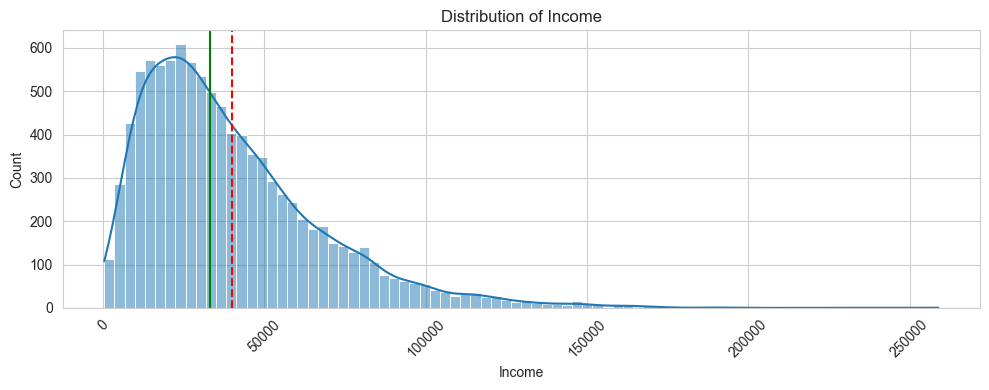

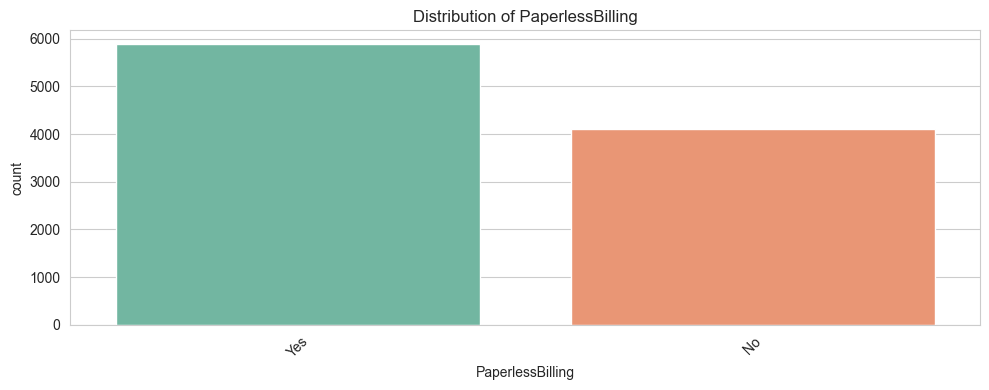

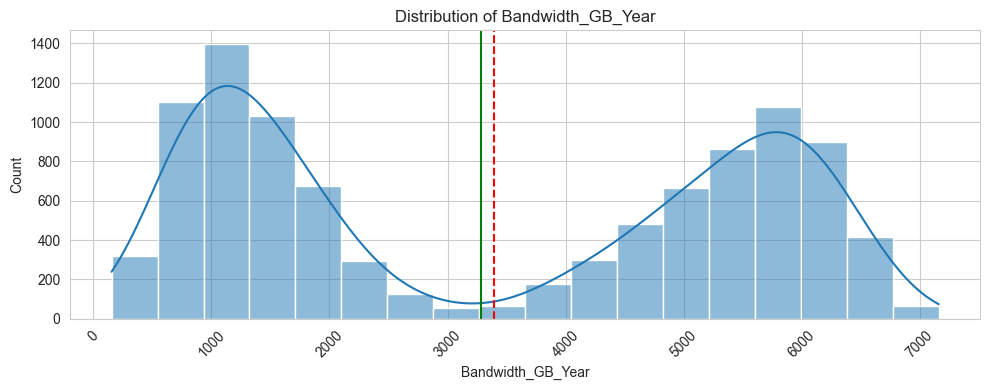

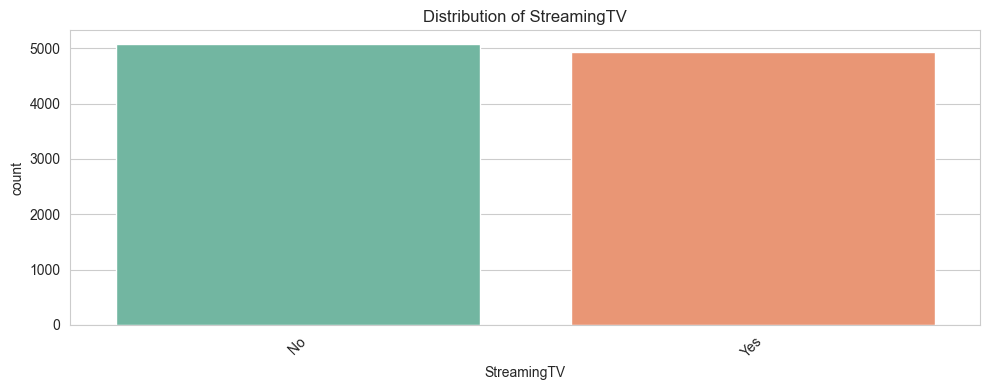

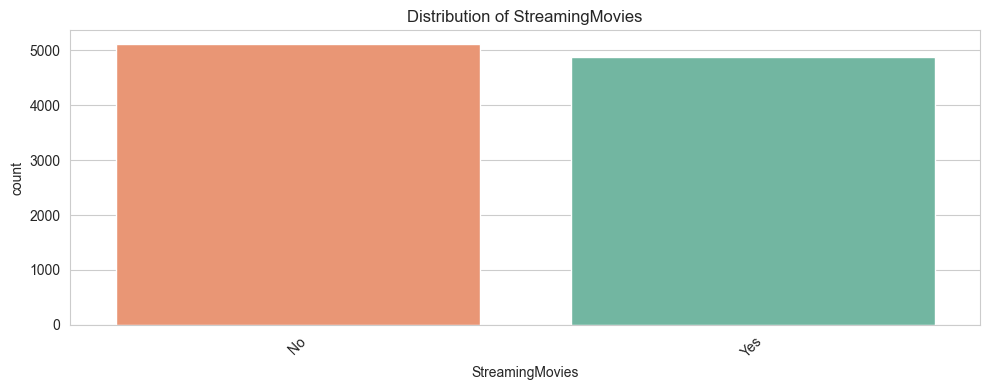

In [4]:
# see attached codes

# my selected variables
selected_variables = ['MonthlyCharge','Tenure', 'InternetService', 'Contract', 
                      'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'Age', 'Gender', 
                      'Income', 'PaperlessBilling', 'Bandwidth_GB_Year', 'StreamingTV', 
                      'StreamingMovies']

# Filtering the dataset to include only the selected variables
selected_df = df[selected_variables]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Univariate visualizations with enhancements
for column in selected_df.columns:
    plt.figure(figsize=(10, 4))
    if selected_df[column].dtype == 'object':
        # For categorical data with updated count plot code
        sns.countplot(x=column,  hue=column, palette='Set2', data=selected_df, order=selected_df[column].value_counts().index)
    else:
        # For numerical data with mean and median lines
        sns.histplot(selected_df[column], kde=True)
        plt.axvline(selected_df[column].mean(), color='r', linestyle='--')
        plt.axvline(selected_df[column].median(), color='g', linestyle='-')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


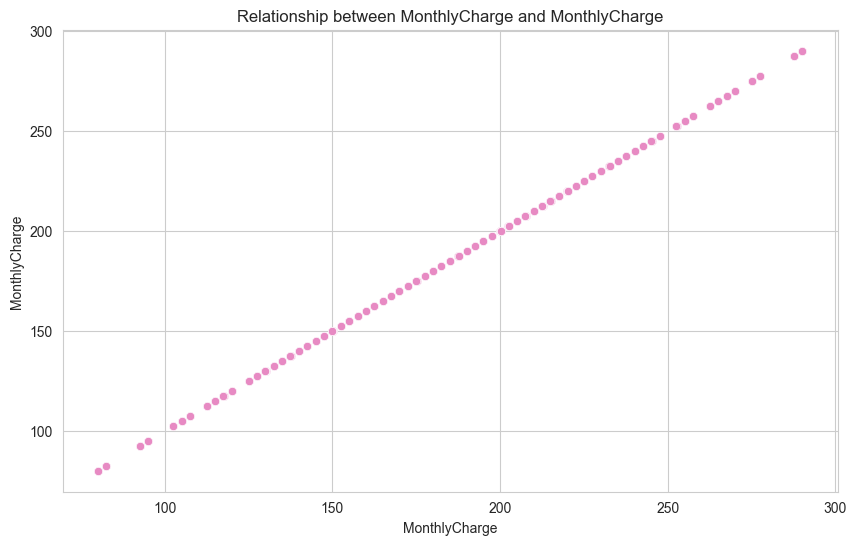

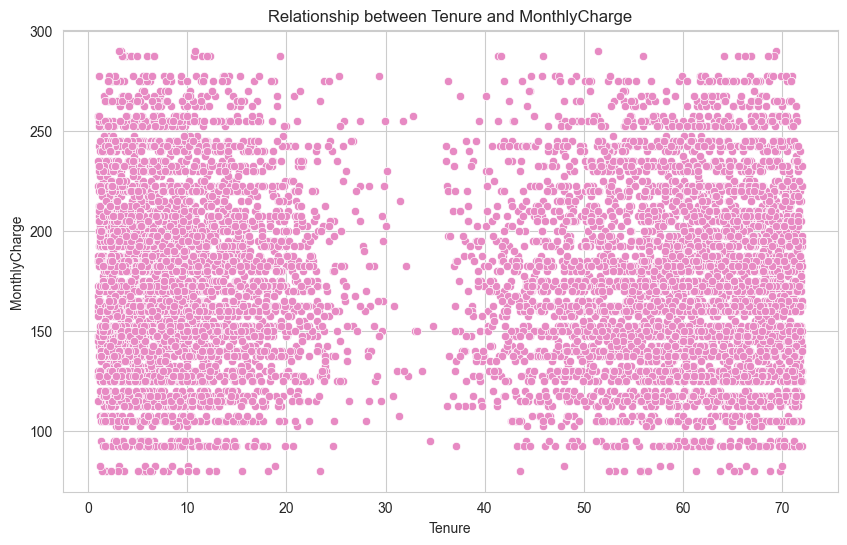

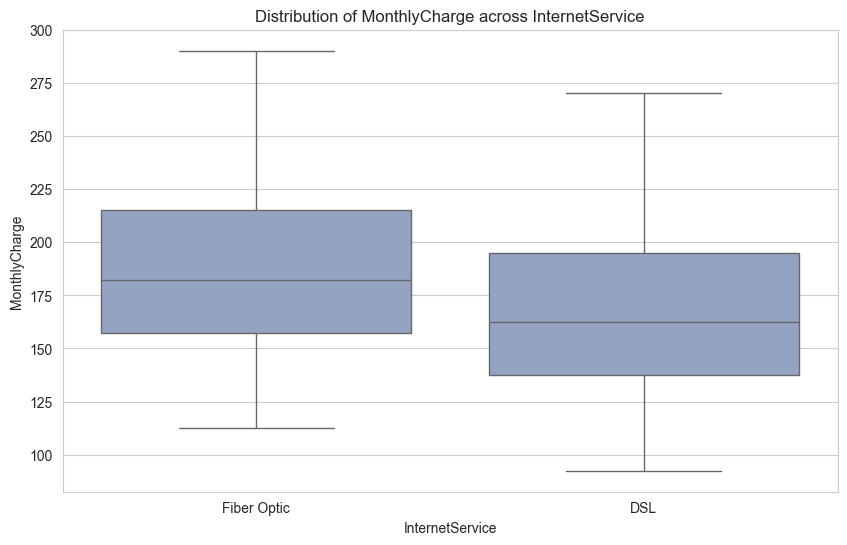

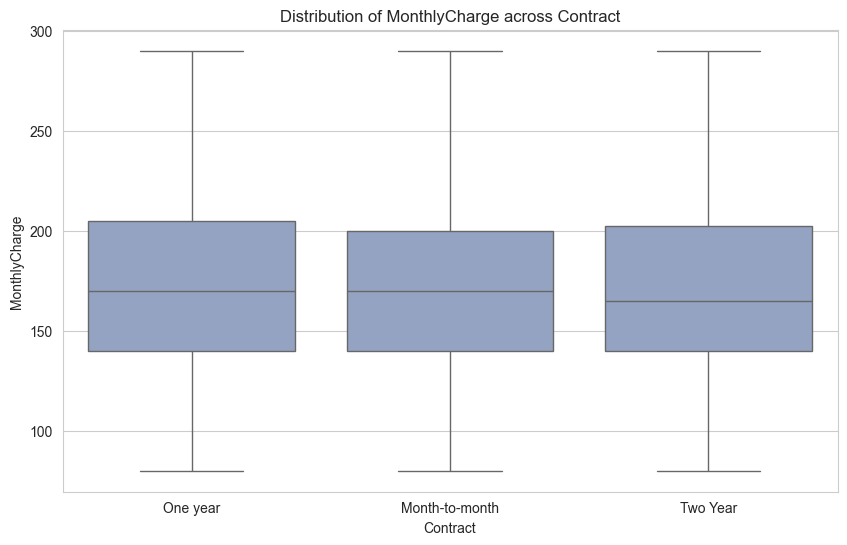

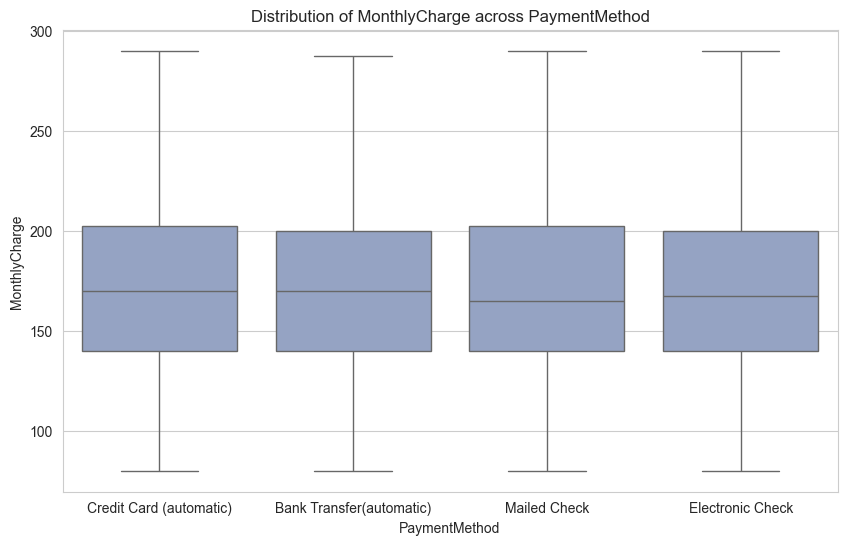

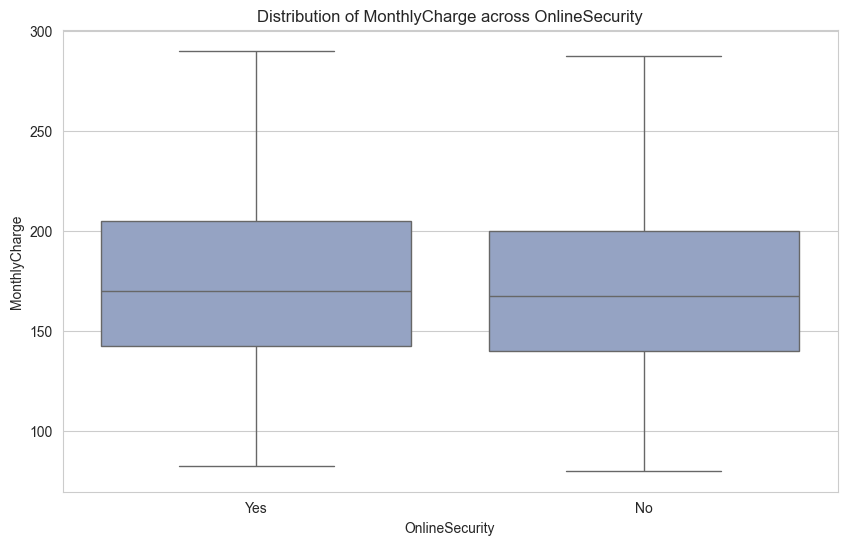

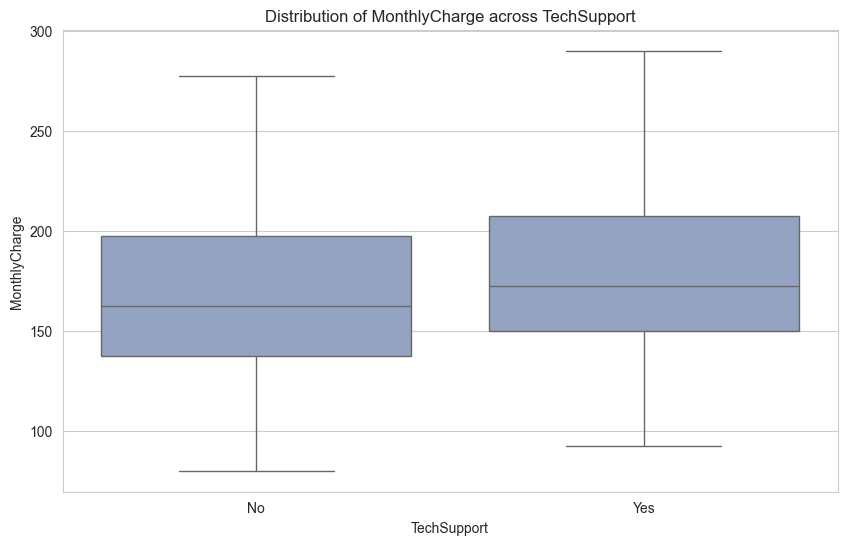

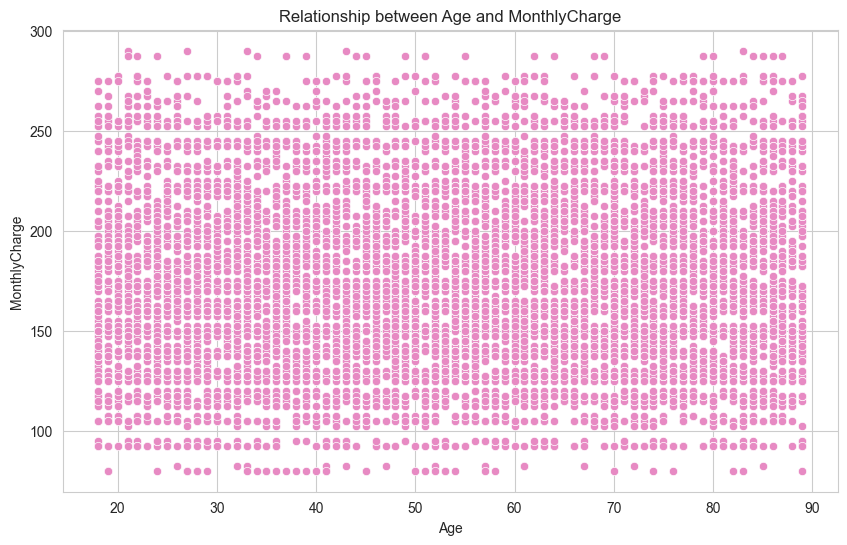

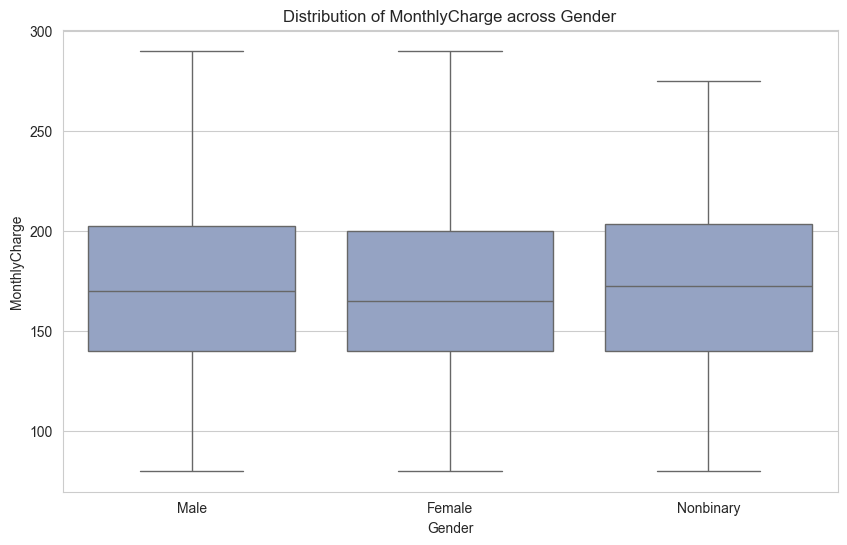

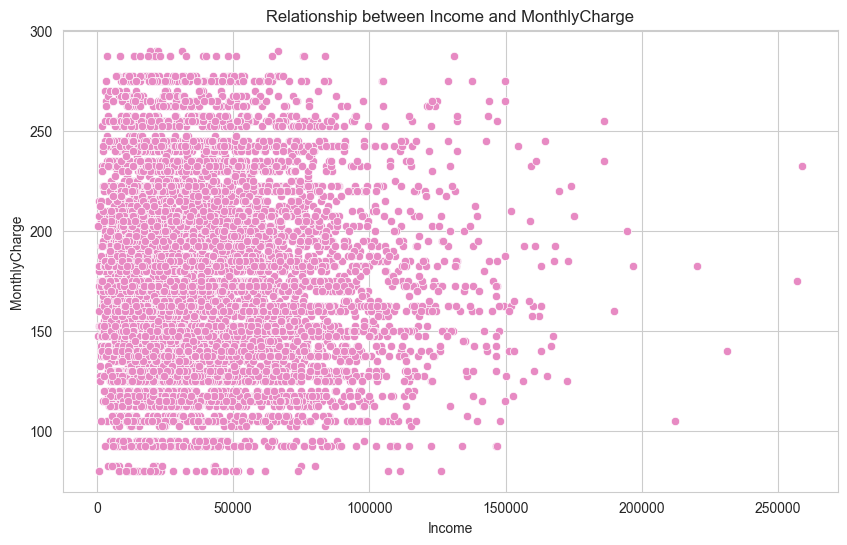

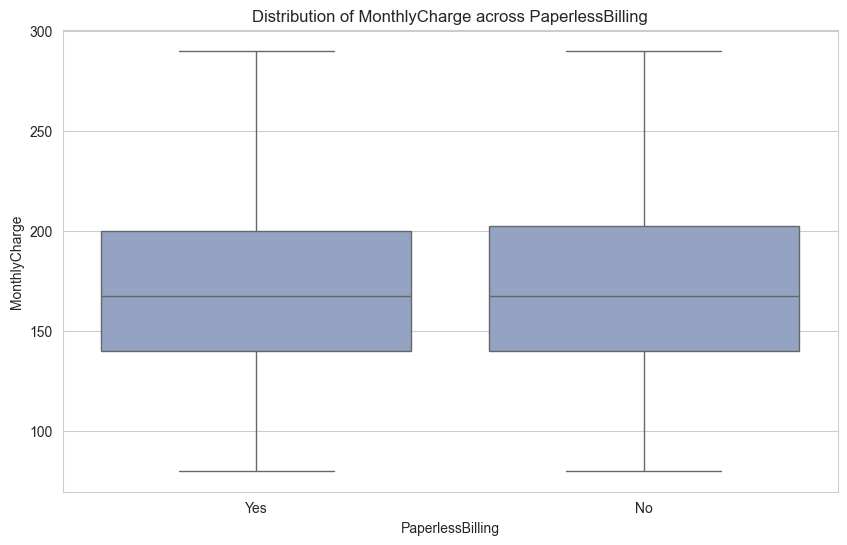

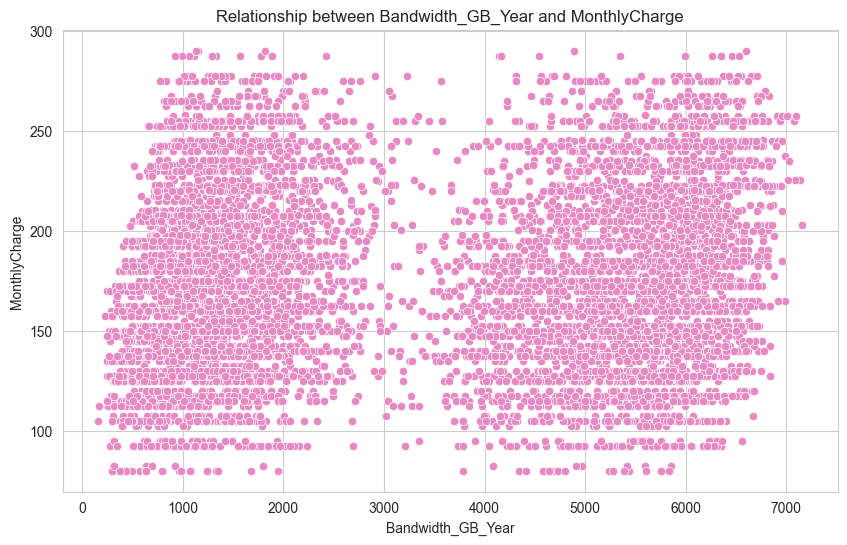

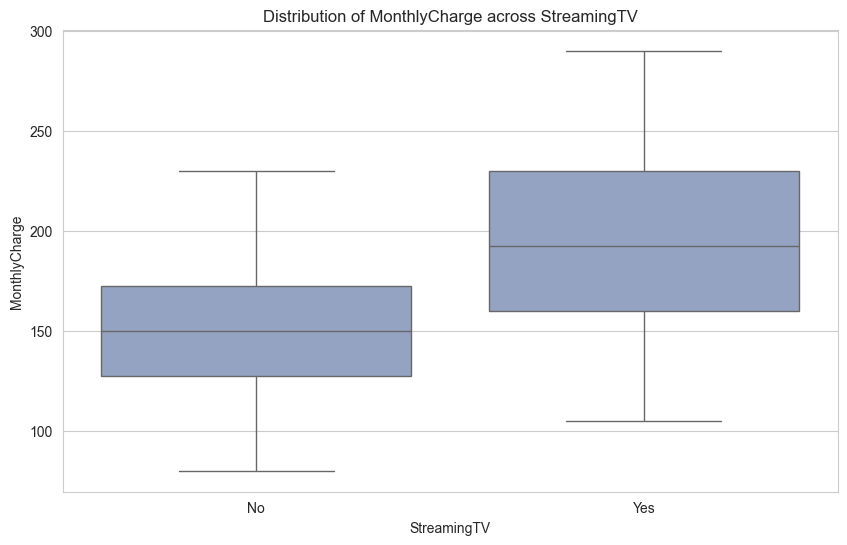

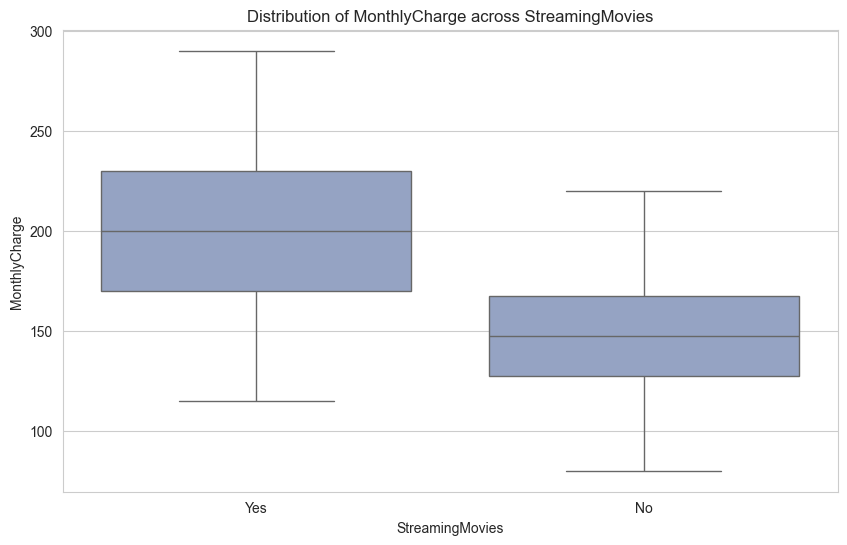

In [35]:
# see attached codes

# Get the "Set2" palette colors
palette_colors = sns.color_palette("Set2")

# Bivariate visualizations
for column in selected_variables:
    plt.figure(figsize=(10, 6))
    if selected_df[column].dtype == 'object':
        # For categorical data: Use a specific color from "Set2" palette
        sns.boxplot(x=column, y='MonthlyCharge', data=selected_df, color=palette_colors[2])
        plt.title(f'Distribution of MonthlyCharge across {column}')
    else:
        # For numerical data: 'MonthlyCharge' against each numerical variable
        # Use another specific color from "Set2" for distinction, if desired
        sns.scatterplot(x=column, y='MonthlyCharge', data=selected_df, color=palette_colors[3])
        plt.title(f'Relationship between {column} and MonthlyCharge')
    plt.show()

#### C4 Describe Data Transformation Goals and Steps

Data Transformation Goals:

*    Ensure data quality and relevance to the research question.
*    Address missing values, outliers, and inconsistencies.

Steps:

*    Identifying Missing Values: Check for missing data in key variables (e.g., customer demographics, service usage).
*    Handling Missing Data: Decide on strategies like imputation or removal, depending on the extent and nature of missing data.
*    Outlier Detection: Identify outliers using statistical methods or visualization. Evaluate their impact and decide whether to keep, transform, or remove them.
*    Data Type Correction: Ensure that all variables are in the correct format (e.g., numerical, categorical).
*    The categorical datatypes being used for the multiple regression analysis will be "dummied" using one-hot encoding.
*    Consistency Check: Verify that data across all variables is consistent, e.g., no negative values in age or usage.


In [36]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [8]:
# Fill missing value in 'InternetService' with 'None'
df['InternetService'].fillna('None', inplace=True)

In [9]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

There are no missing values in this Churn dataset excpet for InternetService which I filled in with 'None' above.

*    Outlier Detection and Handling:
        The below is use to detect outliers in my chosen variables 'Age', 'Income', 'Outage_sec_perweek', 'Population', 'Yearly_equip_failure', 'Tenure'. I retained only those values within three standard deviations from the mean.



In [10]:
# see attached codes

# Define a function to remove outliers based on z-score where absolute value is less than 3
def remove_outliers(df, column_names):
    # Calculate the z-score for each specified column where the absolute z-score is < 3
    mask = np.column_stack([
        np.abs(stats.zscore(df[column])) < 3
        for column in column_names
    ])
    return df[mask.all(axis=1)]

# Apply the function to the dataframe
numeric_columns = ['Tenure', 'MonthlyCharge', 'Age', 'Income', 'Bandwidth_GB_Year']
df = remove_outliers(df, numeric_columns)


# (Statology zscore, 2021)

* Data Type Correction:
  The categorical_vars columns will be converted to a categorical data type, which is appropriate for a variable with discrete, non-numeric values. One-Hot          Encoding: I applied one-hot encoding to categorical variables, transforming them into a format suitable for regression analysis.

In [11]:
# List of categorical variables to one-hot encode
categorical_vars = ['InternetService', 'Contract', 'PaymentMethod', 'OnlineSecurity', 
                    'TechSupport', 'Gender', 'PaperlessBilling', 'StreamingTV', 
                    'StreamingMovies']

# Convert to categorical and apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

* Consistency Check:
  I ensured data consistency by clipping any negative values in my varaiables to 0, as negative values in these columns wouldn't be meaningful.

In [12]:
# Ensure no negative values in my selected independent variables I use .clip method
df['Age'] = df['Age'].clip(lower=0)
df['Income'] = df['Income'].clip(lower=0)
df['Outage_sec_perweek'] = df['Outage_sec_perweek'].clip(lower=0)
df['Population'] = df['Population'].clip(lower=0)
df['Tenure'] = df['Tenure'].clip(lower=0)
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].clip(lower=0)



In [13]:

# converting 'Churn' from 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [14]:

bool_cols = ['InternetService_Fiber Optic', 'InternetService_None', 
    'Contract_One year', 'Contract_Two Year', 
    'PaymentMethod_Credit Card (automatic)', 
    'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 
    'OnlineSecurity_Yes', 'TechSupport_Yes', 'Gender_Male', 
    'Gender_Nonbinary', 'PaperlessBilling_Yes', 'StreamingTV_Yes', 
    'StreamingMovies_Yes']

# Convert boolean columns to integers
df[bool_cols] = df[bool_cols].astype(bool).astype(int)


#### C5 Copy Data to CSV file

In [15]:
# Saving the cleaned dataset
cleaned_file_path = (r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D208\Task_1\churn_clean_After.csv')
df.to_csv(cleaned_file_path, index=False)

#### D1  Initial Multiple Linear Regression Model

The initial multiple linear regression model constructed to explore MonthlyCharge. I incorporates a comprehensive suite of variables, including both demographic and service-related factors. The model's ambitious scope, informed by a meticulous selection of predictors, aims to capture the multifaceted influences on MonthlyCharge. However, recognizing that not every variable may hold significant explanatory power, the model is subjected to rigorous evaluation. This evaluation seeks to refine the model by retaining only those variables that materially contribute to understanding MonthlyCharge variability. Through statistical scrutiny, including examining p-values and assessing multicollinearity, the model is optimized for both interpretability and predictive accuracy. This refinement process underscores a commitment to analytical rigor, ensuring the final model is both lean and potent, ready for application in predictive analytics and decision-making.

(Mark Keith's Machine Learning in Python course materials on YouTube)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9855 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CaseOrder                              9855 non-null   int64  
 1   Customer_id                            9855 non-null   object 
 2   Interaction                            9855 non-null   object 
 3   UID                                    9855 non-null   object 
 4   City                                   9855 non-null   object 
 5   State                                  9855 non-null   object 
 6   County                                 9855 non-null   object 
 7   Zip                                    9855 non-null   int64  
 8   Lat                                    9855 non-null   float64
 9   Lng                                    9855 non-null   float64
 10  Population                             9855 non-null   int64  
 11  Area     

In [16]:
# Initial model for Multiple Linear Regression

import statsmodels.api as sm

# Define dependent and independent variables
dependent_var = 'MonthlyCharge'
independent_vars = ['Tenure', 'Age', 'Income', 'Bandwidth_GB_Year','InternetService_Fiber Optic',
                    'InternetService_None', 'Contract_One year', 'Contract_Two Year', 'PaymentMethod_Credit Card (automatic)', 
                    'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 'OnlineSecurity_Yes', 
                    'TechSupport_Yes', 'Gender_Male', 'Gender_Nonbinary', 'PaperlessBilling_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']

# Set dependent and independent variables
X = df[independent_vars]
y = df[dependent_var]

# Adding a constant to the model (the y-intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print summary of the regression results
print(results.summary())


# (Statology multiple-linear-regression, 2021)

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3229.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:10:51   Log-Likelihood:                -41054.
No. Observations:                9757   AIC:                         8.215e+04
Df Residuals:                    9738   BIC:                         8.228e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

#### D2 Reduction Justification

In addressing my research question, 'What factors influence the monthly charges of customers potentially contributing to their decision to churn?'. It's important to refine my model for accuracy and reliability. I will use Variance Inflation Factor (VIF) analysis and Backward Elimination to strategically towards this issue. VIF analysis identifies and mitigates multicollinearity among predictors by flagging variables with a VIF ≥ 5, a threshold indicating significant multicollinearity. This ensures each variables contributes unique information to the model. This step directly supports my objective by enhancing the model's clarity and the validity of its findings. It's crucial for isolating the true impact of each predictor on customer churn and monthly charges.

Following the mitigation of multicollinearity, Backward Elimination further refines the model by iteratively removing predictors that do not significantly influence the dependent variable, as determined by a p-value threshold of 0.05. This systematic reduction focuses the analysis on statistically significant variables, streamlining the model to highlight the most impactful factors affecting customer behavior. The integration of these techniques results in a more robust and focused model. This will accurately reflects the dynamics of the variables and offer actionable insights into reducing customer churn by addressing key influencing factors.

(WGU Course Videos 2024)

#### D3 Reduced Linear Regression Model



In [17]:
# see attached codes

# Step 1: VIF Analysis to Address Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm  # Ensure statsmodels is imported for regression analysis

# Assigning the dataframe variables for VIF analysis
df_variables = ['Tenure', 'Age', 'Income', 'Bandwidth_GB_Year', 
                'InternetService_Fiber Optic', 'InternetService_None', 
                'Contract_One year', 'Contract_Two Year', 
                'PaymentMethod_Credit Card (automatic)', 
                'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 
                'OnlineSecurity_Yes', 'TechSupport_Yes', 'Gender_Male', 
                'Gender_Nonbinary', 'PaperlessBilling_Yes', 'StreamingTV_Yes', 
                'StreamingMovies_Yes']

# Creating DataFrame for the features and adding a constant for VIF calculation
X = df[df_variables]
X = sm.add_constant(X)

# Calculating VIF for each feature to identify multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                  Feature         VIF
0                                   const   75.650203
1                                  Tenure  456.688983
2                                     Age    1.465924
3                                  Income    1.002188
4                       Bandwidth_GB_Year  464.124008
5             InternetService_Fiber Optic    5.369962
6                    InternetService_None    4.080705
7                       Contract_One year    1.095979
8                       Contract_Two Year    1.095875
9   PaymentMethod_Credit Card (automatic)    1.533600
10         PaymentMethod_Electronic Check    1.668357
11             PaymentMethod_Mailed Check    1.566294
12                     OnlineSecurity_Yes    1.140567
13                        TechSupport_Yes    1.002159
14                            Gender_Male    1.127818
15                       Gender_Nonbinary    1.023763
16                   PaperlessBilling_Yes    1.002005
17                        St

In [18]:
# see attached codes

# Step 2: Backward Elimination to Refine the Model
def backward_elimination(X, y, threshold=0.05):
    # Iteratively remove variables with the highest p-value above threshold
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        max_p = max(p_values)
        feature_with_max_p = p_values.idxmax()
        if max_p > threshold:
            X = X.drop(feature_with_max_p, axis=1)
        else:
            break
    return X

# Applying backward elimination with a p-value threshold of 0.05
X_reduced = backward_elimination(X, y)
model_reduced_result = sm.OLS(y, X_reduced).fit()
# print reduced model
print(f"Reduced Model: \n", model_reduced_result.summary(), "\n")

# print original model for comparison
print("\n", f"Original Model: \n", results.summary())

# (WGU Course Videos 2024)

Reduced Model: 
                             OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     5285.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:11:24   Log-Likelihood:                -41056.
No. Observations:                9757   AIC:                         8.214e+04
Df Residuals:                    9745   BIC:                         8.222e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
c

#### E1 Analysis of Multiple Regression Model

The analysis process began with constructing an initial multiple linear regression model with 14 variables both numerical and categorical predictors. These variables were identified as potentially influencing the dependent variable of 'MonthlyCharge'. A Variance Inflation Factor (VIF) analysis was used to comparison between the initial and reduced linear regression model. This provides crucial insights into how multicollinearity among predictors was addressed to optimize the model. This model was subjected to a backward elimination process to refine it by removing variables that did not significantly contribute to explaining the variability in 'MonthlyCharge'. 

Comparison of Initial and Reduced Models:

*    Model Complexity: The initial model included 18 predictors, reflecting a broad attempt to capture various factors potentially affecting MonthlyCharge. The reduced model, however, focuses on 11 predictors, having eliminated variables through backward elimination based on a significance level threshold of 0.05. This simplification process aimed to retain only those variables with a statistically significant relationship with MonthlyCharge.

*    Model Evaluation Metric (R-squared and Adjusted R-squared): Both the initial and reduced models exhibit an R-squared value of 0.856, indicating that approximately 85.6% of the variability in MonthlyCharge is explained by the models. The adjusted R-squared value, similarly high in both models, suggests that the reduction in the number of predictors did not diminish the model's explanatory power. This outcome underscores the efficiency of the reduced model; it achieves comparable explanatory power with fewer variables, enhancing the model's parsimony.

*    Statistical Significance of Predictors: The backward elimination process led to the exclusion of variables that were not significantly contributing to the model. It was based on their p-values. This methodical refinement ensures that the reduced model concentrates on the most impactful predictors. This streamlined the analysis without sacrificing the depth of insight into the factors driving 'MonthlyCharge'.

*    Interpretation and Decision-Making: The reduced model's simplicity facilitates a more straightforward interpretation of the results. This made clear the  insights into how various factors influence MonthlyCharge. This streamlined model aids in decision-making processes by highlighting the key variables that stakeholders should consider.

Conclusion:

The data analysis process, guided by the principle of parsimony and informed by statistical metrics, led to the development of a reduced linear regression model that maintains the predictive accuracy of the initial comprehensive model while offering enhanced interpretability. The use of R-squared and adjusted R-squared as model evaluation metrics demonstrates that the reduced model efficiently explains a significant portion of the variability in' MonthlyCharge' with fewer predictors, making it a valuable tool for understanding and predicting customer billing patterns.


#### E2  Residual Plot and Residual Standard Error

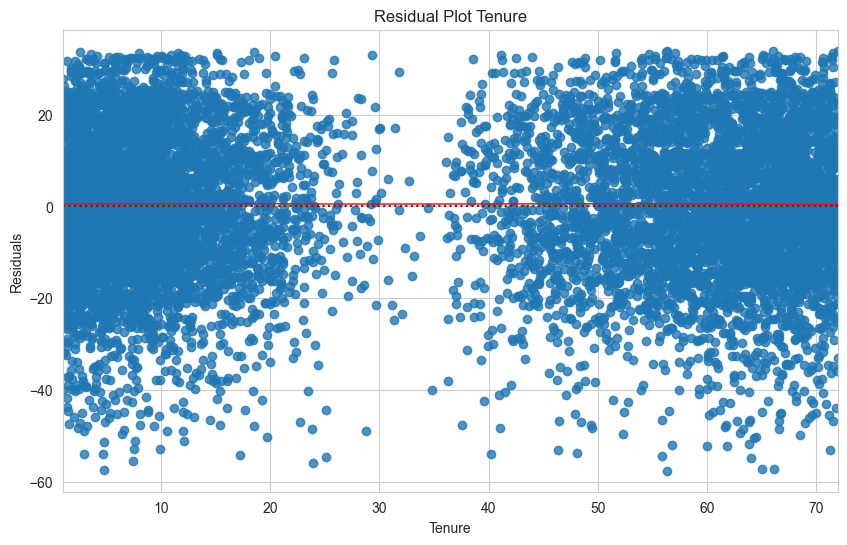

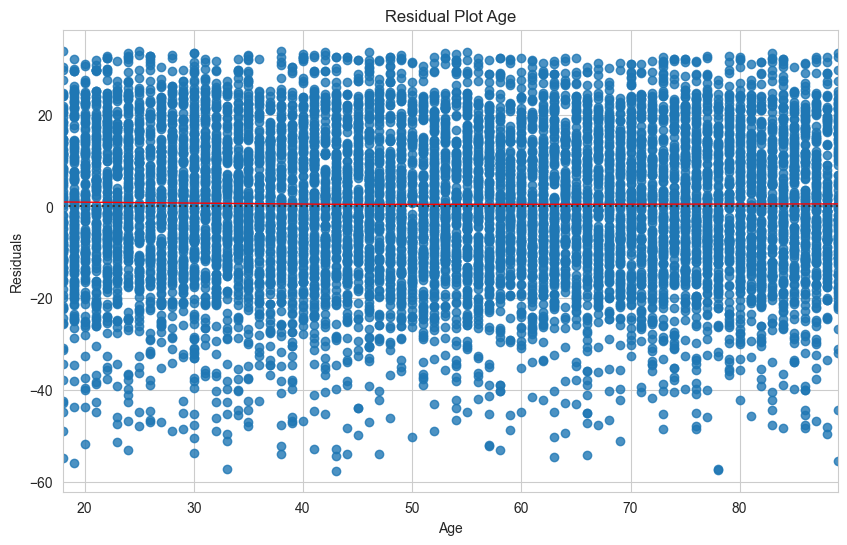

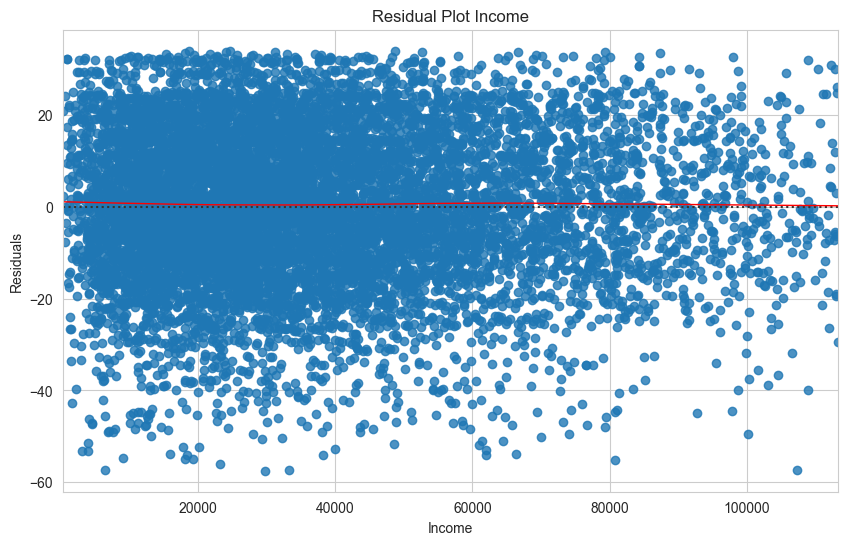

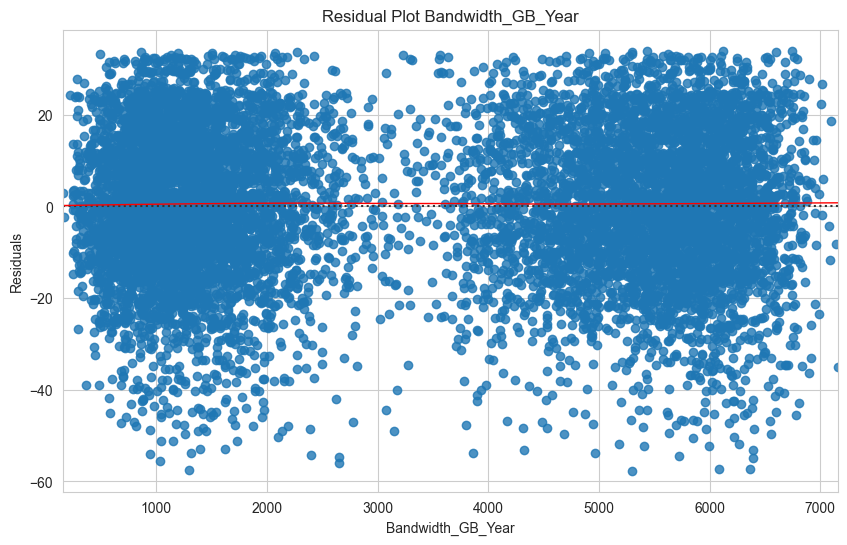

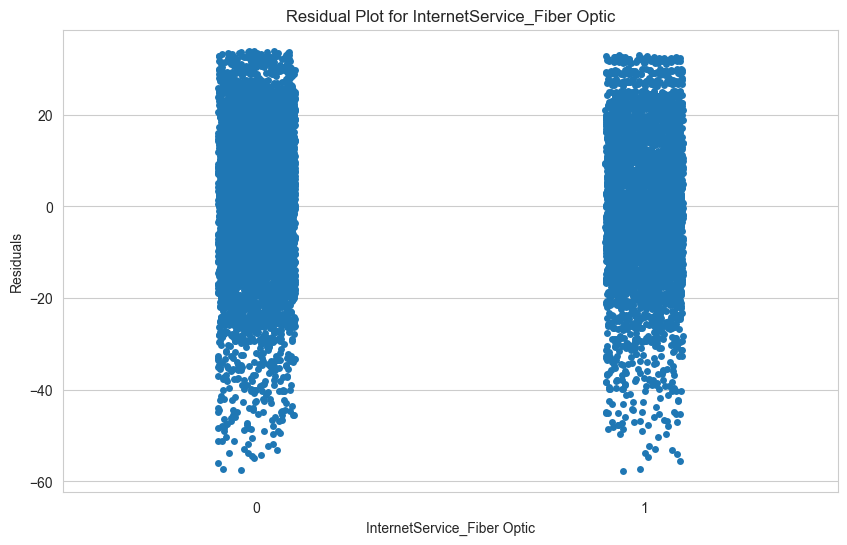

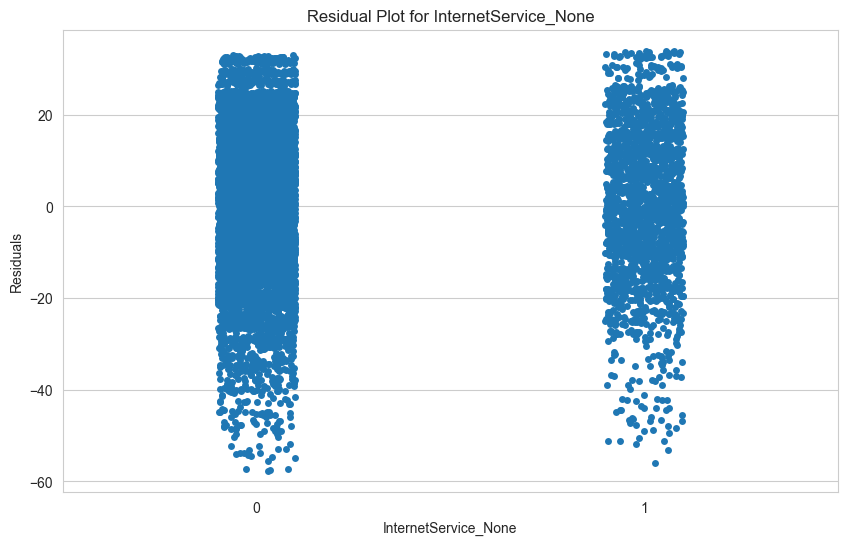

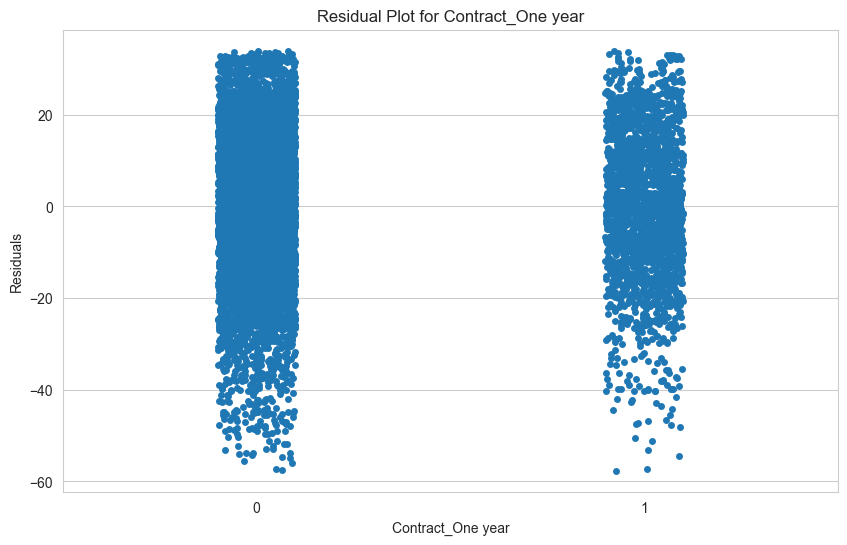

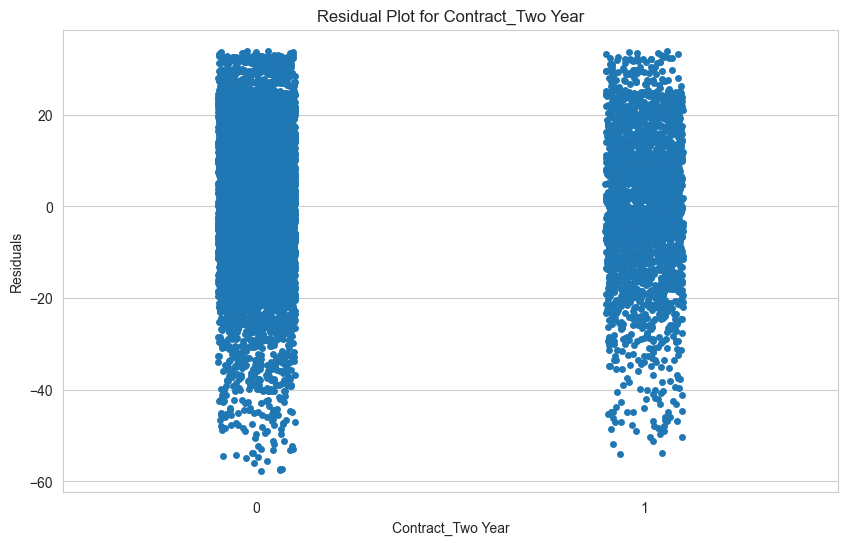

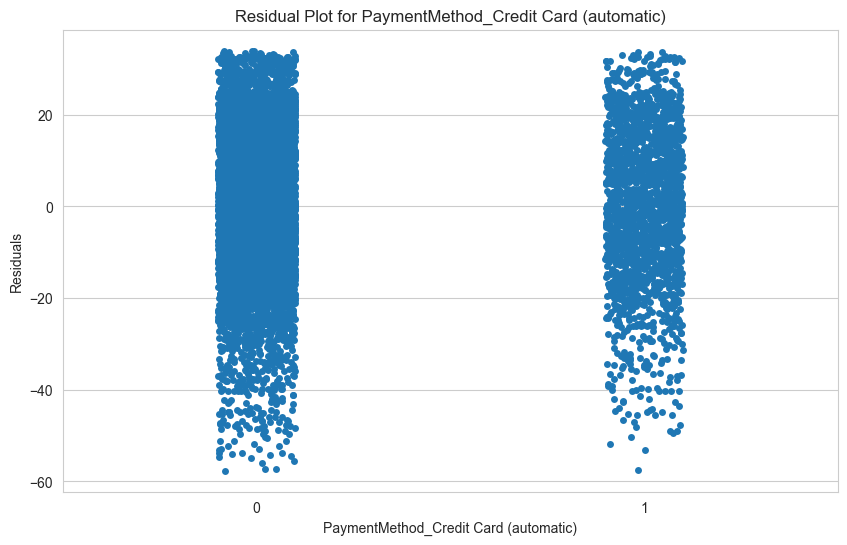

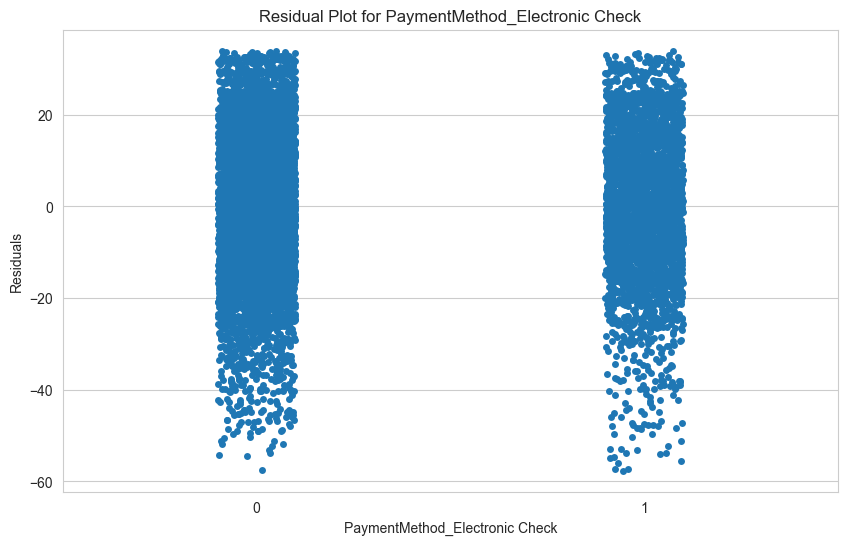

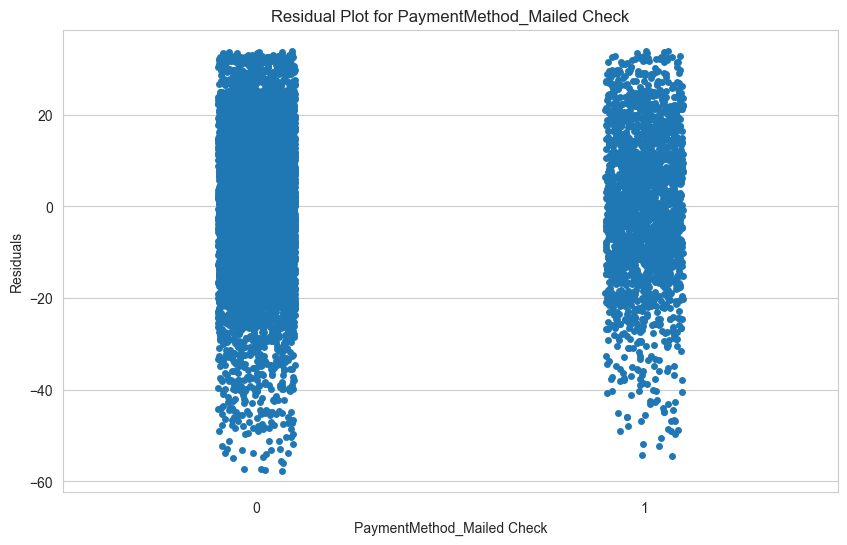

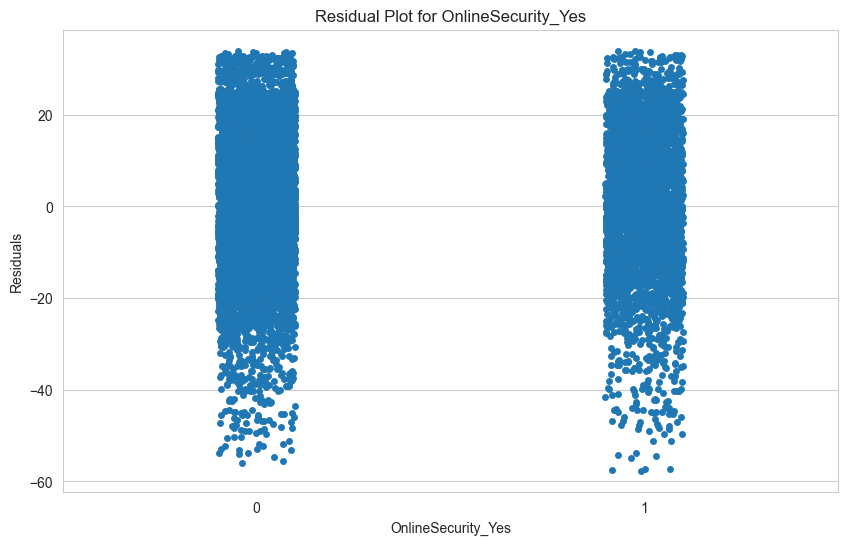

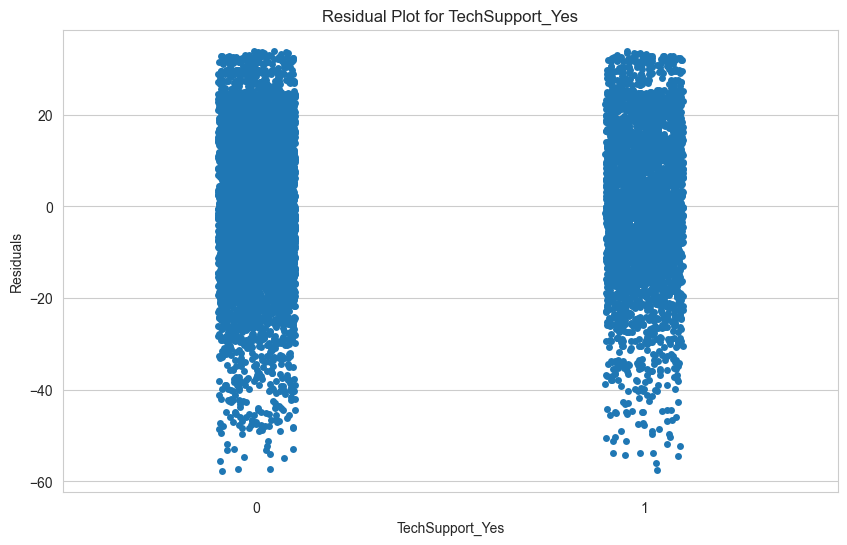

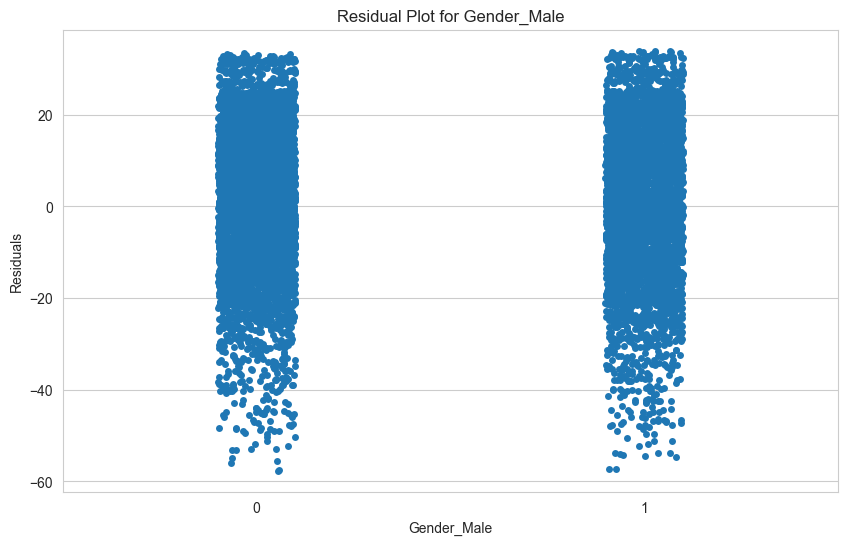

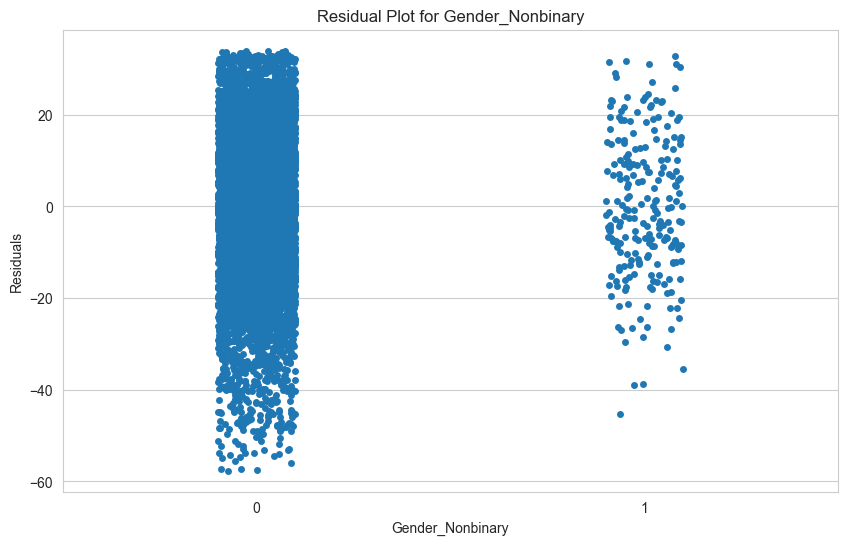

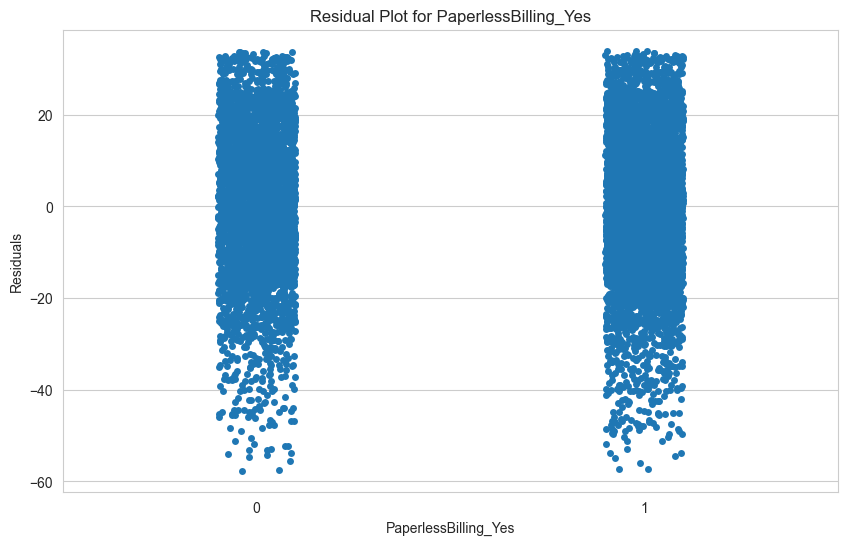

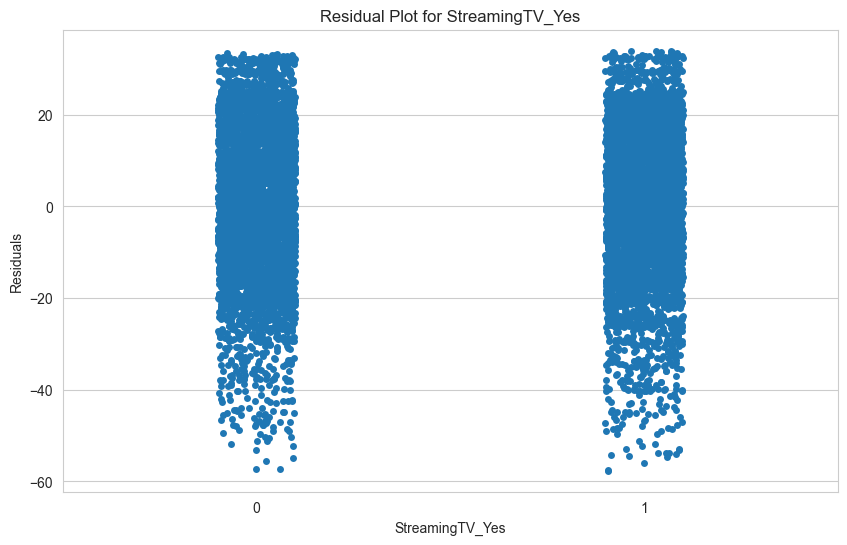

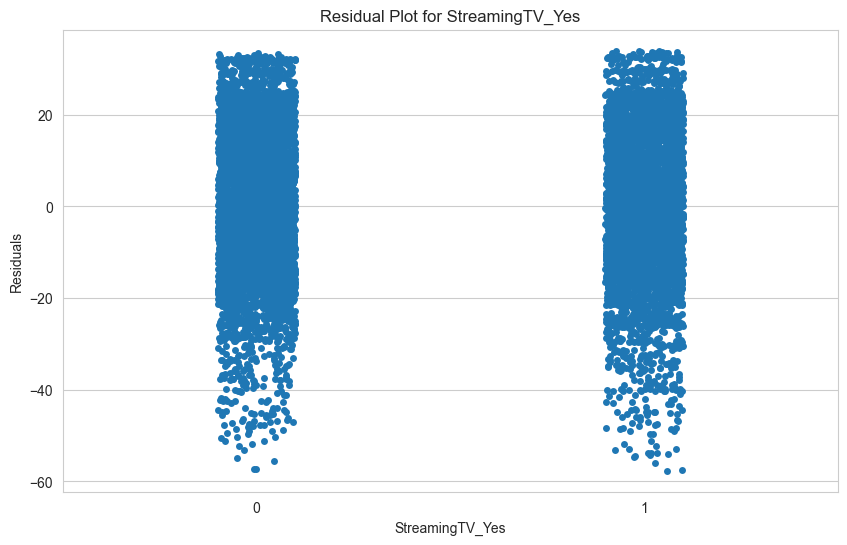

In [19]:
# see attached codes

# Residual Plot using my model_reduced_result

import matplotlib.pyplot as plt
import seaborn as sns

# set resid from model_reduced_result to residuals variable
residuals = model_reduced_result.resid

# independent variable 'Tenure'
plt.figure(figsize=(10, 6))
sns.residplot(x=df['Tenure'], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Tenure')
plt.ylabel('Residuals')
plt.title('Residual Plot Tenure')
plt.show()

# independent variable 'Age'
plt.figure(figsize=(10, 6))
sns.residplot(x=df['Age'], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.title('Residual Plot Age')
plt.show()

# independent variable 'Income'
plt.figure(figsize=(10, 6))
sns.residplot(x=df['Income'], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Income')
plt.ylabel('Residuals')
plt.title('Residual Plot Income')
plt.show()

# independent variable 'Bandwidth_GB_Year'
plt.figure(figsize=(10, 6))
sns.residplot(x=df['Bandwidth_GB_Year'], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Bandwidth_GB_Year')
plt.ylabel('Residuals')
plt.title('Residual Plot Bandwidth_GB_Year')
plt.show()

# independent variable 'InternetService_Fiber Optic'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['InternetService_Fiber Optic'], y=residuals)
plt.xlabel('InternetService_Fiber Optic')
plt.ylabel('Residuals')
plt.title('Residual Plot for InternetService_Fiber Optic')
plt.show()

# independent variable 'InternetService_None'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['InternetService_None'], y=residuals)
plt.xlabel('InternetService_None')
plt.ylabel('Residuals')
plt.title('Residual Plot for InternetService_None')
plt.show()

# independent variable 'Contract_One year'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['Contract_One year'], y=residuals)
plt.xlabel('Contract_One year')
plt.ylabel('Residuals')
plt.title('Residual Plot for Contract_One year')
plt.show()

# independent variable 'Contract_Two Year'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['Contract_Two Year'], y=residuals)
plt.xlabel('Contract_Two Year')
plt.ylabel('Residuals')
plt.title('Residual Plot for Contract_Two Year')
plt.show()

# independent variable 'PaymentMethod_Credit Card (automatic)'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['PaymentMethod_Credit Card (automatic)'], y=residuals)
plt.xlabel('PaymentMethod_Credit Card (automatic)')
plt.ylabel('Residuals')
plt.title('Residual Plot for PaymentMethod_Credit Card (automatic)')
plt.show()


# independent variable 'PaymentMethod_Electronic Check'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['PaymentMethod_Electronic Check'], y=residuals)
plt.xlabel('PaymentMethod_Electronic Check')
plt.ylabel('Residuals')
plt.title('Residual Plot for PaymentMethod_Electronic Check')
plt.show()

# independent variable 'PaymentMethod_Mailed Check'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['PaymentMethod_Mailed Check'], y=residuals)
plt.xlabel('PaymentMethod_Mailed Check')
plt.ylabel('Residuals')
plt.title('Residual Plot for PaymentMethod_Mailed Check')
plt.show()


# independent variable 'OnlineSecurity_Yes'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['OnlineSecurity_Yes'], y=residuals)
plt.xlabel('OnlineSecurity_Yes')
plt.ylabel('Residuals')
plt.title('Residual Plot for OnlineSecurity_Yes')
plt.show()

# independent variable 'TechSupport_Yes'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['TechSupport_Yes'], y=residuals)
plt.xlabel('TechSupport_Yes')
plt.ylabel('Residuals')
plt.title('Residual Plot for TechSupport_Yes')
plt.show()

# independent variable 'Gender_Male'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['Gender_Male'], y=residuals)
plt.xlabel('Gender_Male')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gender_Male')
plt.show()


# independent variable 'Gender_Nonbinary'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['Gender_Nonbinary'], y=residuals)
plt.xlabel('Gender_Nonbinary')
plt.ylabel('Residuals')
plt.title('Residual Plot for Gender_Nonbinary')
plt.show()


# independent variable 'PaperlessBilling_Yes'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['PaperlessBilling_Yes'], y=residuals)
plt.xlabel('PaperlessBilling_Yes')
plt.ylabel('Residuals')
plt.title('Residual Plot for PaperlessBilling_Yes')
plt.show()

# independent variable 'StreamingTV_Yes'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['StreamingTV_Yes'], y=residuals)
plt.xlabel('StreamingTV_Yes')
plt.ylabel('Residuals')
plt.title('Residual Plot for StreamingTV_Yes')
plt.show()

# independent variable 'StreamingTV_Yes'
plt.figure(figsize=(10, 6))
sns.stripplot(x=df['StreamingTV_Yes'], y=residuals)
plt.xlabel('StreamingTV_Yes')
plt.ylabel('Residuals')
plt.title('Residual Plot for StreamingTV_Yes')
plt.show()


# (WGU Course Videos 2024)

In [20]:
# see attached codes

# Residual Standard Error

import numpy as np


# Calculate the number of observations (n) and predictors (p)
n = len(residuals)
p = X_reduced.shape[1]

# Residual Standard Error calculation
RSE = np.sqrt(np.sum(residuals**2) / (n - p - 1))
print("Residual Standard Error:", RSE)

Residual Standard Error: 16.274482768857595


#### E3  A Executable Error-Free copy of the codes used

I will provided in a ipynb file call 'Predictive_Modeling.ipynb' in my submission.

#### F1 Summary of Findings

Regression Equation for the Reduced Model: The reduced linear regression model, after backward elimination, resulted in the following equation:

MonthlyCharge=1.8610−12.5493×Tenure+0.5155×Age+0.1532×Bandwidth_GB_Year+83.2130×InternetService_Fiber Optic+49.6663×InternetService_None−8.9650×OnlineSecurity_Yes+11.6109×TechSupport_Yes−10.3001×Gender_Male+3.6269×Gender_Nonbinary+7.3543×StreamingTV_Yes+20.2079×StreamingMovies_Yes

Interpretation of the Coefficients:
*  The coefficients of the reduced model suggest that for every additional year of tenure, the MonthlyCharge decreases by about 12.5493, indicating that longer-term customers tend to have lower monthly charges. Each additional year of age is associated with an increase in MonthlyCharge by approximately 0.5155, and for every GB increase in yearly bandwidth usage, the MonthlyCharge increases by about 0.1532.

Statistical and Practical Significance:
* The model has a high R-squared value of 0.856, showing that it explains a significant portion of the variability in MonthlyCharge. The predictors have statistical significance, evidenced by their p-values, and practical significance, showing clear trends that can inform business strategies.

Limitations of the Data Analysis:

*  The analysis is constrained by the scope of the dataset and may not account for all factors influencing MonthlyCharge, such as external economic conditions or individual customer preferences. The linear model assumes a specific type of relationship between variables that may not capture more complex interactions, and potential multicollinearity, despite a high condition number, suggests the need for further examination of predictor relationships.

 
(WGU Courseware Resources 2024)

#### F2 Recommended Course of Action

Recommendations:

*  Customer Retention: Focus on customer retention strategies, especially for those with longer tenure, as they are associated with lower monthly charges and, potentially, higher customer satisfaction.

*  Age Demographics: Consider targeting strategies by age group, since age appears to influence MonthlyCharge.

*  Bandwidth Usage: As bandwidth usage is positively associated with MonthlyCharge, offering competitive packages for higher bandwidth consumption might attract or retain customers.

*  Further Analysis: Conduct additional analysis to investigate multicollinearity and explore non-linear relationships, which may provide deeper insights into customer behavior and pricing strategies.

*  Data Expansion: Expand the dataset to include more diverse variables, potentially including qualitative customer feedback or broader market data, to enhance the model's predictive power and reliability.

#### G Panopto Video Link

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=df881198-54a8-4739-8bef-b127004ea9bf


#### H Citations

(Mark Keith's Machine Learning in Python course materials on YouTube):  https://www.youtube.com/watch?v=0-fkgpK2knA&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=9

(Statology multiple-linear-regression, 2021): https://www.statology.org/multiple-linear-regression-assumptions/

(Statology zscore, 2021) https://www.statology.org/z-score-python/

(WGU COurse Videos 2024): https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970

WGU Courseware Resources 2024): https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=09b8fdbb-a374-452b-ba53-af39001ff3f3 

